In [10]:
using ExprOptimization

In [11]:
ruleset = @ruleset begin
    Real = x
    Real = Real * Real
    Real = Real + Real
    Real = Real - Real
    Real = 0.0
    Real = 1.0
    Real = 2.0
    Real = 3.0
    Real = 4.0
    Real = 5.0
end

ExprRules.RuleSet(Any[:x, :(Real * Real), :(Real + Real), :(Real - Real), 0.0, 1.0, 2.0, 3.0, 4.0, 5.0], Symbol[:Real, :Real, :Real, :Real, :Real, :Real, :Real, :Real, :Real, :Real], Bool[true, false, false, false, true, true, true, true, true, true], Dict(:Real=>[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))

In [12]:
ground_truth(x) = x + 2
function ExprOptimization.loss(tree::RuleNode)
    ex = get_executable(tree, ruleset)
    los = 0.0
    global x
    for x = -5.0:0.1:5.0
        los += abs2(eval(ex) - ground_truth(x))
    end
    los
end

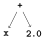

In [13]:
trees = RuleNode[]
push!(trees, RuleNode(5))
push!(trees, RuleNode(7))
push!(trees, RuleNode(1))
push!(trees, RuleNode(3, [RuleNode(1), RuleNode(7)]))

display(trees[4], ruleset)

In [14]:
i = 0
for t in trees
    ex = get_executable(t, ruleset)
    @printf("%2d  %15s  %5f\n", i+=1, string(ex), loss(t))
end

 1              0.0  1262.500000
 2              2.0  858.500000
 3                x  404.000000
 4          x + 2.0  0.000000


In [16]:
p = MonteCarloParams(500, 5)
srand(10)
results = optimize(p, ruleset, :Real)

ExprOptimization.ExprOptResults(ExprRules.RuleNode(3, ExprRules.RuleNode[ExprRules.RuleNode(1, ExprRules.RuleNode[]), ExprRules.RuleNode(7, ExprRules.RuleNode[])]), 0.0, :(x + 2.0), nothing)

In [20]:
(results.expr, results.loss)

(:(x + 2.0), 0.0)